# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Fixed Sum Implementation

Fixed sum position sizing technique means spending a fixed amount of capital on every trade. The capital spent on each trade does not change even if the account size grows. In this notebook, you will learn to implement the fixed sum position sizing technique on the index reversal strategy. The notebook is divided into the following parts:

1. [Read the Data](#read)
1. [Fixed Sum Portfolio Calculation](#sum)
1. [Portion of Capital](#portion)
1. [Leverage Ratio](#leverage)
    
## Import Libraries

In [1]:
# Data manipulation
import pandas as pd

# Quantra functions to analyse the performace and plot graphs
import sys
sys.path.append("..")
from data_modules.position_sizing_quantra import performance_analysis, plot_leverage, plot_portion_of_capital

# Import matplotlib and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

<a id='read'></a>
## Read the Data

The SPY ETF data is read and the fixed sum technique is applied to the index reversal strategy. The SPY ETF price is read from `SPY_data_15_59.csv` and the index reversal strategy's trading signal and the portfolio value are read from a file named `strategy_data.csv`.

The strategy data starting from 1st January 2005 is considered so that the position sizing techniques can be compared with the performance results of the index reversal strategy.

In [2]:
# Read the price data of one minute before the market close
spy_price = pd.read_csv(
    '../data_modules/SPY_data_15_59.csv', index_col=0, parse_dates=True)

# Set the date as the index for the price data
spy_price.index = pd.to_datetime(spy_price.index.date)

# Consider the data starting from 1st January 2005
spy_price = spy_price.loc['2005-01-01':]

# Read the signal and cumulative returns of the index reversal strategy
strategy = pd.read_csv('../data_modules/strategy_data.csv',
                       index_col=0, parse_dates=True)

# Preview the strategy data
strategy.head()

,signal,returns,cumulative_returns
2005-01-03,0,-0.000000,1.000000
2005-01-04,1,-0.000000,1.000000
2005-01-05,1,-0.003537,0.996463
2005-01-06,0,0.003296,0.999747
2005-01-07,0,-0.000000,0.999747


<a id='sum'></a>
## Fixed Sum Portfolio Calculation

The fixed sum is the technique to use a fixed capital for each trade. In this technique, you use a fixed capital (such as $10,000) for each trade.

The portfolio value is calculated by performing the following steps:
1. Calculate the profit-and-loss (pnl) on one unit of the SPY asset.
2. Compute the number of units to buy each trade. This is done by dividing the fixed capital with the close price of the SPY asset.
$$ \text{Number of units to buy} = \frac{\text{Fixed capital}}{\text{Price of the SPY asset}} $$
3. Calculate the pnl for the number of units of asset traded.
4. Take the cumulative sum of the total pnl and add the initial capital to see how the portfolio value changes over time. Note that the cumulative sum is used here and not cumulative product, because each time we trade, the capital being traded is fixed. No matter whether a profit is made or not, the trade capital remains unchanged. Thus, the account growth is additive, not multiplicative.

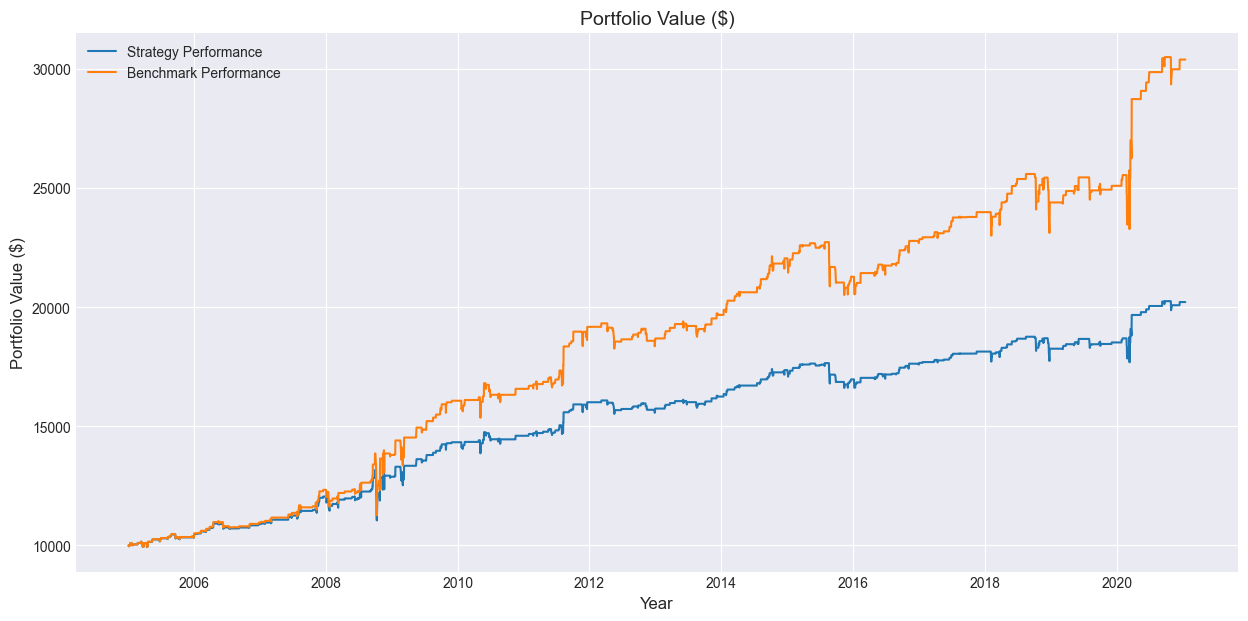

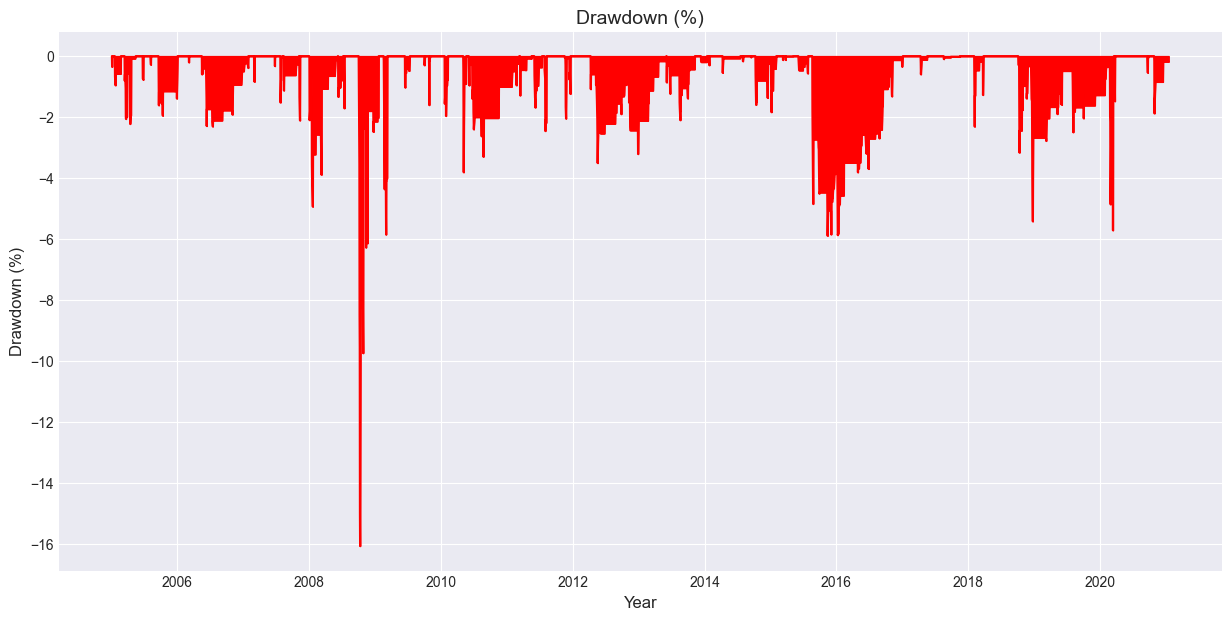

Total returns: 102.19%
Annualised returns (CAGR): 4.5%
Maximum drawdown (MDD): -16.07%
Return-to-MDD ratio: 0.28


In [3]:
# Define the initial capital
initial_capital = 10000

# Calculate the profit and loss per unit of the asset
spy_price['pnl'] = spy_price['Close'].diff()

# Dataframe to store strategy returns for fixed sum technique
fixed_sum = pd.DataFrame()

# Calculate number of units to trade based on the fixed capital
fixed_sum['number_of_units'] = initial_capital // spy_price['Close']

# Caclculate the profit and loss for the strategy with fixed sum
fixed_sum['pnl'] = spy_price['pnl'] * \
    strategy['signal'].shift(1) * fixed_sum['number_of_units']

# Calculate the portfolio value after implementation of the fixed sum
fixed_sum['portfolio_value'] = fixed_sum['pnl'].cumsum() + initial_capital

# Calculate the performance metrics and plot the portfolio value alongwith the benchmark
performance_analysis(
    fixed_sum['portfolio_value'].dropna(),
    strategy['cumulative_returns']*initial_capital
)

<a id='portion'></a>
## Portion of Capital

The portion of capital is the wealth used in each trade. Since the total capital is fixed, the wealth used per trade should be equal to the fixed sum. But since we can not purchase fractional assets, the portion of capital spent is sometimes a little bit less than the fixed sum.

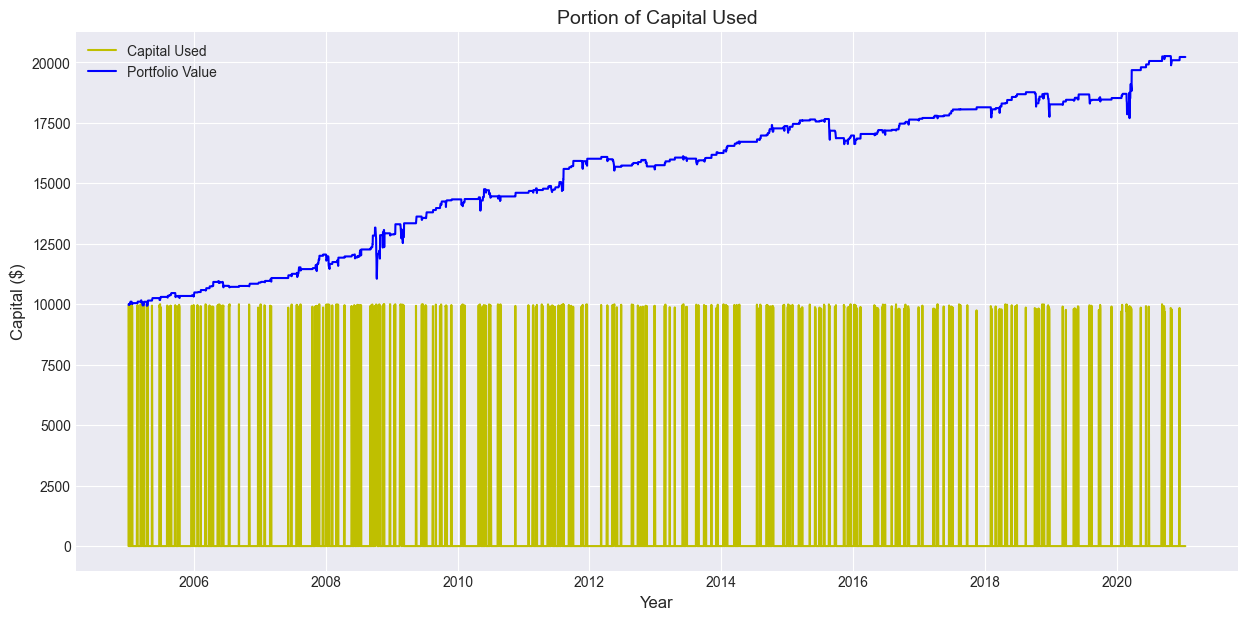

In [4]:
# Portion of capital used
fixed_sum['portion_of_capital'] = fixed_sum['number_of_units'] * \
    spy_price['Close'] * strategy['signal']

# Plot the portion of capital used
plot_portion_of_capital(
    fixed_sum['portion_of_capital'], fixed_sum['portfolio_value'])

The maximum capital used in this technique is the initial capital of $10,000. For each trade, we trade only that amount, no matter what is the close price of the SPY ETF.

<a id='leverage'></a>
## Leverage Ratio
The leverage ratio is the ratio of the wealth used in each trade (`fixed_sum['portion_of_capital']`), to the available capital(`fixed_sum['portfolio_value']`).

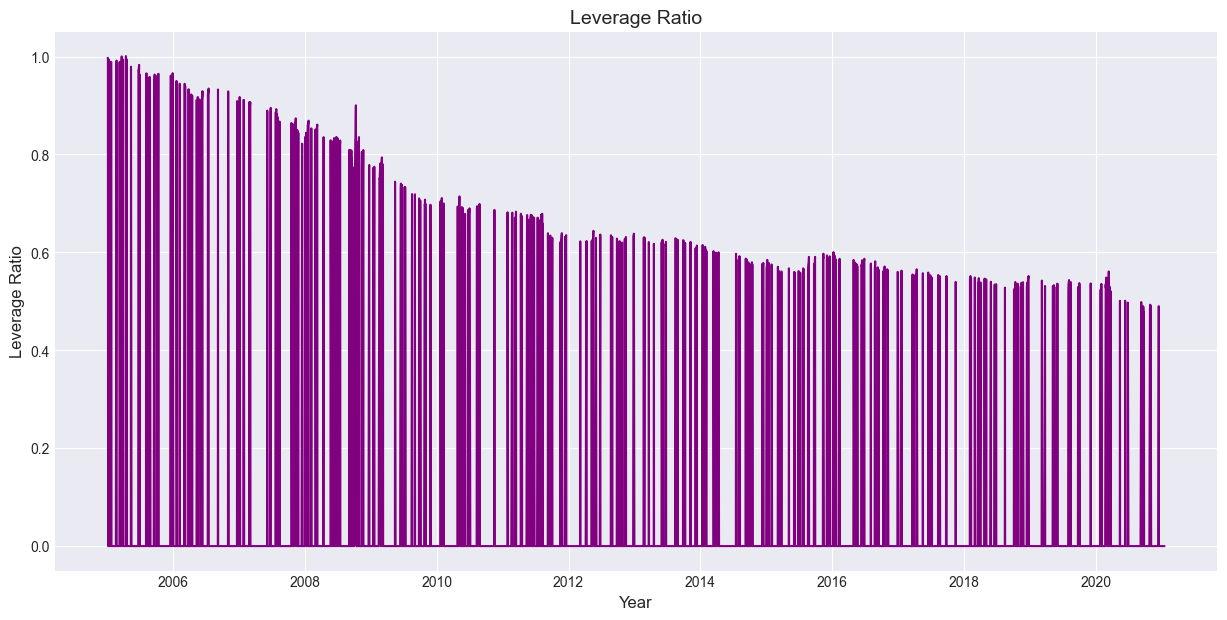

In [5]:
# Leverage ratio
fixed_sum['leverage'] = fixed_sum['portion_of_capital'] / \
    fixed_sum['portfolio_value']

# Plot the leverage ratio
plot_leverage(fixed_sum['leverage'])

The leverage keeps on reducing over time. This is because we are not reinvesting the profits from the trades and investing only $10,000 even if we have more capital to spend. As the account size grows, the leverage thus decreases.

In the upcoming section, you will learn about the fixed percentage and fixed fraction techniques.
<br><br>